In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Function to create model
def create_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning
learning_rates = [0.001, 0.01]
batch_sizes = [32, 64]

best_accuracy = 0
best_params = {}
best_model = None

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with Learning Rate: {lr}, Batch Size: {batch_size}")
        model = create_model(learning_rate=lr)
        model.fit(x_train, y_train, epochs=3, batch_size=batch_size, verbose=1)
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
        print(f"Accuracy: {accuracy}")

        # Update best parameters if accuracy improves
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'batch_size': batch_size}
            best_model = model  # Store the best model

# Print the best parameters
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_params}")

# Classify a single image with the best model
test_image = x_test[0]  # Let's classify the first image in the test set
test_image_label = np.argmax(y_test[0])  # Get the true label of the image

# Add an extra dimension to the image (to make it 4D)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
predicted_class = best_model.predict(test_image)
predicted_label = np.argmax(predicted_class)

Training with Learning Rate: 0.001, Batch Size: 32


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9102 - loss: 0.3013
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - accuracy: 0.9826 - loss: 0.0568
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9903 - loss: 0.0324
Accuracy: 0.9865000247955322
Training with Learning Rate: 0.001, Batch Size: 64
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.8974 - loss: 0.3593
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9822 - loss: 0.0606
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9891 - loss: 0.0359
Accuracy: 0.9837999939918518
Training with Learning Rate: 0.01, Batch Size: 32
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9208 - loss: 0.2644
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9807 - loss: 0.0639
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9845 - loss: 0.0522
Accuracy: 0.9749000072479248
Training with Lea

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


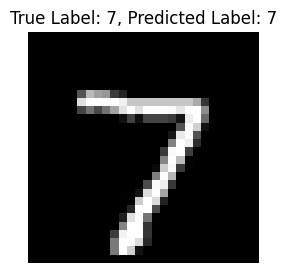

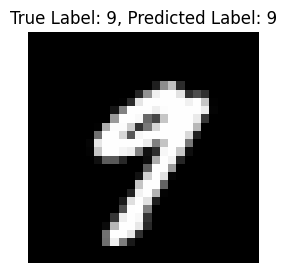

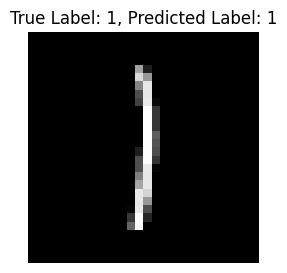

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Select a few test images and their labels
indices = [0, 20, 40]  # Specify the indices of the images to display
test_images = x_test[indices]
true_labels = np.argmax(y_test[indices], axis=1)

# Predict the labels for the selected images
predicted_labels = np.argmax(best_model.predict(test_images), axis=1)

# Plot the images with their true and predicted labels
for i, idx in enumerate(indices):
    plt.figure(figsize=(3, 3))
    plt.imshow(test_images[i].squeeze(), cmap='gray')  # Remove extra dimensions with squeeze()
    plt.title(f"True Label: {true_labels[i]}, Predicted Label: {predicted_labels[i]}")
    plt.axis('off')  # Turn off axis
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


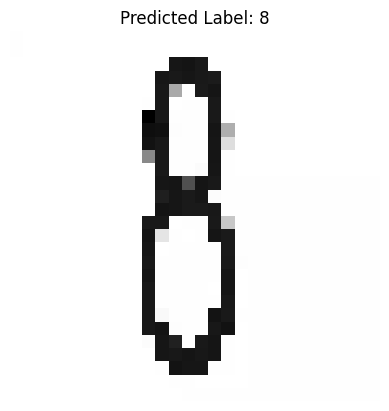

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a custom image (ensure it's 28x28 grayscale)
custom_image_path = "/content/8-pic.png"  # Replace with your image file path
custom_image = load_img(custom_image_path, color_mode="grayscale", target_size=(28, 28))

# Preprocess the image
custom_image_array = img_to_array(custom_image).astype('float32') / 255.0
custom_image_array = custom_image_array.reshape(1, 28, 28, 1)  # Add batch dimension

# Predict the label using the best model
predicted_label = np.argmax(best_model.predict(custom_image_array), axis=1)

# Display the image and prediction
plt.imshow(custom_image_array.squeeze(), cmap='gray')  # Remove batch and channel dimensions
plt.title(f"Predicted Label: {predicted_label[0]}")
plt.axis('off')
plt.show()
